# Final Project - DSSA-5102

Instructor: Melissa Laurino</br>

Name: Louise Ramos, Hamza Khan
</br>
Date: April 25, 2024

Dataset name:</b> Student Mental health<br>
Download link: https://www.kaggle.com/datasets/shariful07/student-mental-health

Dataset name:</b> Medical Student Mental Health
<br>
Download link: https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health

Dataset name:</b> Student Stress Factors: A Comprehensive Analysis
<br>
Download link:https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

In [2]:
# Importing library
import pandas as pd
import pymysql
import mysql.connector
import matplotlib.pyplot as plt
import csv

In [3]:
# Reading in the data

mental_health = pd.read_csv("Student Mental health.csv")

stress_student = pd.read_csv("StressLevelDataset.csv")

medical_mental = pd.read_csv("Data Carrard et al. 2022 MedTeach.csv")

In [4]:
#Looking at the data 
mental_health.head() 

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
#Looking at the data 
medical_mental.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [6]:
#Looking at the data 
stress_student.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [10]:
# Getting the duplicates for each data file

# This is to get a count of the duplicates
def count_duplicate_rows(input_file):
    row_counts = {}
    duplicate_count = 0
    
    #The formunal for looking at the CSV files 
    with open(input_file, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  
        for row in reader:
            # Making sure that it is by row not columns duplicates
            row_tuple = tuple(row)
            if row_tuple in row_counts:
                row_counts[row_tuple] += 1
            else:
                row_counts[row_tuple] = 1
    
    # Getting the count for each
    for row_tuple, count in row_counts.items():
        if count > 1:
            duplicate_count += (count - 1)  
    
    return duplicate_count

# The CSV files
csv_files = [
    ('mental_health'),
    ('medical_mental'),
    ('stress_student')
]

for csv_filename in csv_files:
    input_csv_file = csv_filename
    
    # Getting the function to be able to print it
    duplicate_count = count_duplicate_rows(input_csv_file)
    
    # Printing the number of duplicate rows
    print("File:", notebook_name)
    print("Number of duplicate rows found:", duplicate_count)
    print()

File: mental_health
Number of duplicate rows found: 0

File: medical_mental
Number of duplicate rows found: 0

File: stress_student
Number of duplicate rows found: 0



In [6]:
# Counting missing values
missing_count_mental = mental_health.isna().sum()

missing_count_medical = medical_mental.isna().sum()

missing_count_stress = stress_student.isna().sum()

# Printing the count
print(f"{missing_count_mental} \n") 
print(f"{missing_count_medical} \n")
print(missing_count_stress)

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64 

id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64 

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression        

In [7]:
#Dropping the missing value in the first dataset
mental_health.dropna(axis=0, inplace=True)

In [8]:
# Checking type of data in column
frame_types_mh = mental_health.dtypes
frame_types_mm = medical_mental.dtypes
frame_types_ss = stress_student.dtypes

print(f"{frame_types_mh} \n") 
print(f"{frame_types_mm} \n")
print(frame_types_ss)

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object 

id             int64
age            int64
year           int64
sex            int64
glang          int64
part           int64
job            int64
stud_h         int64
health         int64
psyt           int64
jspe           int64
qcae_cog       int64
qcae_aff       int64
amsp           int64
erec_mean    float64
cesd           int64
stai_t         int64
mbi_ex     

In [9]:
#Adding an ID column to the two datasets that dont have one

mental_health['id'] = range(1, len(mental_health) + 1)

stress_student['id'] = range(1, len(stress_student) + 1)


In [10]:
# Changing old column names to new ones
new_column_mh = {
    'Timestamp': 'timestamp',
    'Choose your gender': 'gender',
    'Age': 'age',
    'What is your course?': 'course',
    'Your current year of Study': 'current_year',
    'What is your CGPA?': 'cgpa',
    'Marital status': 'marital_status',
    'Do you have Depression?': 'depression',
    'Do you have Anxiety?': 'anxiety',
    'Do you have Panic attack?': 'panic_attack',
    'Did you seek any specialist for a treatment?': 'specialist_treatment'
}

# Renaming columns
mental_health.rename(columns=new_column_mh, inplace=True)

# Showing the data with new names
mental_health.head() 

,timestamp,gender,age,course,current_year,cgpa,marital_status,depression,anxiety,panic_attack,specialist_treatment,id
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,4
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,5


In [11]:
# Check the number of rows in the DataFrame
num_r_mh = len(mental_health)
num_r_mm = len(medical_mental)
num_r_ss = len(stress_student)
print("Number of rows mental health:", num_r_mh)
print("Number of rows medical mental:", num_r_mm)
print("Number of rows stress student:", num_r_ss)

Number of rows mental health: 100
Number of rows medical mental: 886
Number of rows stress student: 1100


In [12]:
#Save the newly cleaned dataset as a NEW file:
mental_health.to_csv('mental_health_clean.csv', index=False)
medical_mental.to_csv('medical_mental_clean.csv', index=False)
stress_student.to_csv('stress_student_clean.csv', index=False)

# Making a Dataframe and adding tables

In [13]:
# Importing libraries
import mysql.connector
import sqlite3

In [14]:
# Reading the clean data 
dfmh = pd.read_csv('mental_health_clean.csv')

dfmm = pd.read_csv('medical_mental_clean.csv')

dfss = pd.read_csv('stress_student_clean.csv')


In [15]:
# Showing the first few rows of the Data
dfmh.head()

,timestamp,gender,age,course,current_year,cgpa,marital_status,depression,anxiety,panic_attack,specialist_treatment,id
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,4
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,5


In [16]:
# Showing the first few rows of the Data
dfmm.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [17]:
# Showing the first few rows of the Data
dfss.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,id
0,14,20,0,11,2,1,2,4,2,3,...,3,2,3,3,2,3,3,2,1,1
1,15,8,1,15,5,3,1,4,3,1,...,1,4,1,5,1,4,5,5,2,2
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,3
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,4
4,16,28,0,7,2,3,5,1,3,2,...,4,3,1,2,1,5,0,5,1,5


In [18]:
# Checking type of data in column
frame_mh = dfmh.dtypes
frame_mm = dfmm.dtypes
frame_ss = dfss.dtypes

print(f"{frame_mh} \n") 
print(f"{frame_mm} \n")
print(frame_ss)

timestamp                object
gender                   object
age                     float64
course                   object
current_year             object
cgpa                     object
marital_status           object
depression               object
anxiety                  object
panic_attack             object
specialist_treatment     object
id                        int64
dtype: object 

id             int64
age            int64
year           int64
sex            int64
glang          int64
part           int64
job            int64
stud_h         int64
health         int64
psyt           int64
jspe           int64
qcae_cog       int64
qcae_aff       int64
amsp           int64
erec_mean    float64
cesd           int64
stai_t         int64
mbi_ex         int64
mbi_cy         int64
mbi_ea         int64
dtype: object 

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache    

In [19]:
# Connecting to mysql database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1734680nN" 
)

# Creating a cursor
mycursor = mydb.cursor()

# Creating the database if it doesn't exist
mycursor.execute("CREATE DATABASE IF NOT EXISTS Student_Mental_Health")

# Closing the cursor and connection
mycursor.close()
mydb.close()


 # Creating first table cluster (student)

In [20]:
# Reconnecting to the database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1734680nN",
  database="Student_Mental_Health"
)

# New cursor
mycursor = mydb.cursor()

# Creating a student table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS student (
  student_id INT AUTO_INCREMENT PRIMARY KEY,
  gender VARCHAR(255),
  age FLOAT,
  marital_status VARCHAR(255)
)
""")

# Creating academics table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS academics (
  academic_id INT AUTO_INCREMENT PRIMARY KEY,
  student_id INT,
  course VARCHAR(255),
  current_year VARCHAR(255),
  cgpa VARCHAR(255),  -- Consider using VARCHAR instead of FLOAT to match the input data
  FOREIGN KEY (student_id) REFERENCES student(student_id)
)
""")

# Creating mental_health table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS mental_health (
  health_id INT AUTO_INCREMENT PRIMARY KEY,
  student_id INT,
  depression VARCHAR(3),
  anxiety VARCHAR(3),
  panic_attack VARCHAR(3),
  specialist_treatment VARCHAR(3),
  FOREIGN KEY (student_id) REFERENCES student(student_id)
)
""")

# Committing the changes
mydb.commit()


In [21]:
# Populating the tables
# Connecting to my database
conn = pymysql.connect(host='localhost',
                       user='root',
                       password='1734680nN',
                       db='Student_Mental_Health')

# Inserting data into the student table
student_data = dfmh[['gender', 'age', 'marital_status']].values.tolist()
student_query = "INSERT INTO student (gender, age, marital_status) VALUES (%s, %s, %s)"
with conn.cursor() as cursor:
    cursor.executemany(student_query, student_data)
with conn.cursor() as cursor:
    cursor.execute("SELECT student_id FROM student")
    student_ids = [row[0] for row in cursor.fetchall()]

# Inserting data into the academics table
academics_data = dfmh[['course', 'current_year', 'cgpa']].values.tolist()
academics_query = "INSERT INTO academics (course, current_year, cgpa, student_id) VALUES (%s, %s, %s, %s)"
academics_data_with_id = [(data + [student_id]) for data, student_id in zip(academics_data, student_ids)]
with conn.cursor() as cursor:
    cursor.executemany(academics_query, academics_data_with_id)

# Inserting the data into the mental_health table
mental_health_data = dfmh[['depression', 'anxiety', 'panic_attack', 'specialist_treatment']].values.tolist()
mental_health_query = "INSERT INTO mental_health (depression, anxiety, panic_attack, specialist_treatment, student_id) VALUES (%s, %s, %s, %s, %s)"
mental_health_data_with_id = [(data + [student_id]) for data, student_id in zip(mental_health_data, student_ids)]
with conn.cursor() as cursor:
    cursor.executemany(mental_health_query, mental_health_data_with_id)


In [22]:
# Testing the tables
# Function to test if populated properly
def execute_query(query):
    with conn.cursor() as cursor:
        cursor.execute(query)
        result = cursor.fetchall()
    return result

# Testing if the student table was populated
student_query = "SELECT * FROM student"
student_data = execute_query(student_query)
print("Student table data:")
print(pd.DataFrame(student_data))

# Testing to see if the academics table was populated
academics_query = "SELECT * FROM academics"
academics_data = execute_query(academics_query)
print("\nAcademics table data:")
print(pd.DataFrame(academics_data))

# Testing the mental_health table
mental_health_query = "SELECT * FROM mental_health"
mental_health_data = execute_query(mental_health_query)
print("\nMental Health table data:")
print(pd.DataFrame(mental_health_data))


# Committing changes and closing connection
conn.commit()
conn.close()

Student table data:
       0       1     2    3
0      1  Female  18.0   No
1      2    Male  21.0   No
2      3    Male  19.0   No
3      4  Female  22.0  Yes
4      5    Male  23.0   No
..   ...     ...   ...  ...
195  196  Female  21.0   No
196  197    Male  18.0   No
197  198  Female  19.0  Yes
198  199  Female  23.0   No
199  200    Male  20.0   No

[200 rows x 4 columns]

Academics table data:
       0    1                   2       3            4
0      1    1         Engineering  year 1  3.00 - 3.49
1      2    2   Islamic education  year 2  3.00 - 3.49
2      3    3                 BIT  Year 1  3.00 - 3.49
3      4    4                Laws  year 3  3.00 - 3.49
4      5    5        Mathemathics  year 4  3.00 - 3.49
..   ...  ...                 ...     ...          ...
195  196   96                 BCS  year 1  3.50 - 4.00
196  197   97         Engineering  Year 2  3.00 - 3.49
197  198   98            Nursing   Year 3  3.50 - 4.00
198  199   99    Pendidikan Islam  year 4  3.50

# Creating second table cluster (medical_student)

In [23]:

# Reconnecting to the database again
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1734680nN",
  database="Student_Mental_Health"
)

# Creating a cursor
mycursor = mydb.cursor()

# Creating medical student table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS medical_student (
  id INT AUTO_INCREMENT PRIMARY KEY,
  age INT,
  year VARCHAR(255),
  sex VARCHAR(255),
  glang VARCHAR(255),
  part VARCHAR(255),
  job VARCHAR(255),
  stud_h VARCHAR(255),
  jspe VARCHAR(255),
  health VARCHAR(255)
)
""")

# Creating test scores table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS test_scores (
  id INT AUTO_INCREMENT PRIMARY KEY,
  medical_student_id INT,
  psyt FLOAT,
  qcae_cog FLOAT,
  qcae_aff FLOAT,
  amsp FLOAT,
  erec_mean FLOAT,
  cesd FLOAT,
  stai_t FLOAT,
  FOREIGN KEY (medical_student_id) REFERENCES medical_student(id)
)
""")

# Creating the maslach burnout inventory table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS maslach_burnout_inventory (
  id INT AUTO_INCREMENT PRIMARY KEY,
  medical_student_id INT,
  mbi_ex FLOAT,
  mbi_cy FLOAT,
  mbi_ea FLOAT,
  FOREIGN KEY (medical_student_id) REFERENCES medical_student(id)
)
""")

# Committing the changes
mydb.commit()


In [24]:
# Populating the medical student tables
# Connecting to my database
conn = pymysql.connect(host='localhost',
                       user='root',
                       password='1734680nN',
                       db='Student_Mental_Health')


# Inserting data into the medical student table
medical_student_data = dfmm[['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health']].values.tolist()
medical_student_query = "INSERT INTO medical_student (age, year, sex, glang, part, job, stud_h, health) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
with conn.cursor() as cursor:
    cursor.executemany(medical_student_query, medical_student_data)
with conn.cursor() as cursor:
    cursor.execute("SELECT id FROM medical_student")
    medical_student_ids = [row[0] for row in cursor.fetchall()]

# Inserting data into the test scores table
test_scores_data = dfmm[['psyt', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t']].values.tolist()
test_scores_query = "INSERT INTO test_scores (psyt, qcae_cog, qcae_aff, amsp, erec_mean, cesd, stai_t, medical_student_id) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
test_scores_data_with_id = [(data + [student_id]) for data, student_id in zip(test_scores_data, medical_student_ids)]
with conn.cursor() as cursor:
    cursor.executemany(test_scores_query, test_scores_data_with_id)

# Inserting data into the maslach burnout inventory table
maslach_burnout_inventory_data = dfmm[['mbi_ex', 'mbi_cy', 'mbi_ea']].values.tolist()
maslach_burnout_inventory_query = "INSERT INTO maslach_burnout_inventory (mbi_ex, mbi_cy, mbi_ea, medical_student_id) VALUES (%s, %s, %s, %s)"
maslach_burnout_inventory_data_with_id = [(data + [student_id]) for data, student_id in zip(maslach_burnout_inventory_data, medical_student_ids)]
with conn.cursor() as cursor:
    cursor.executemany(maslach_burnout_inventory_query, maslach_burnout_inventory_data_with_id)
conn.commit()
    

In [25]:
# Testing the tables
# Defining the function test the tables
def execute_query(query):
    with conn.cursor() as cursor:
        cursor.execute(query)
        result = cursor.fetchall()
    return result

# Testing if the medical_student table was populated
medical_student_query = "SELECT * FROM medical_student"
medical_student_data = execute_query(medical_student_query)
print("Medical Student table data:")
print(pd.DataFrame(medical_student_data))

# Testing if the test_scores table was populated
test_scores_query = "SELECT * FROM test_scores"
test_scores_data = execute_query(test_scores_query)
print("\nTest Scores table data:")
print(pd.DataFrame(test_scores_data))

# Testing if the maslach_burnout_inventory table was populated
maslach_burnout_inventory_query = "SELECT * FROM maslach_burnout_inventory"
maslach_burnout_inventory_data = execute_query(maslach_burnout_inventory_query)
print("\nMaslach Burnout Inventory table data:")
print(pd.DataFrame(maslach_burnout_inventory_data))

# Closing the connection
conn.close()

Medical Student table data:
        0   1  2  3    4  5  6   7     8  9
0    3545  18  1  1  120  1  0  56  None  3
1    3546  26  4  1    1  1  0  20  None  4
2    3547  21  3  2    1  0  0  36  None  3
3    3548  21  2  2    1  0  1  51  None  5
4    3549  21  3  1    1  1  0  22  None  4
..    ...  .. .. ..  ... .. ..  ..   ... ..
881  4426  21  2  1    1  1  0  45  None  3
882  4427  20  2  2    1  0  0  13  None  3
883  4428  19  1  1    1  0  0  50  None  5
884  4429  24  5  2    1  0  0  20  None  2
885  4430  22  3  1    1  0  1  20  None  5

[886 rows x 10 columns]

Test Scores table data:
        0     1    2     3     4     5         6     7     8
0    3545  3545  0.0  62.0  27.0  17.0  0.738095  34.0  61.0
1    3546  3546  0.0  55.0  37.0  22.0  0.690476   7.0  33.0
2    3547  3547  0.0  64.0  39.0  17.0  0.690476  25.0  73.0
3    3548  3548  0.0  52.0  33.0  18.0  0.833333  17.0  48.0
4    3549  3549  0.0  58.0  28.0  21.0  0.690476  14.0  46.0
..    ...   ...  ...   ...  

# Creating third table cluster (student_stress)

In [57]:
# Reconnecting to the database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1734680nN",
  database="Student_Mental_Health"
)

# Creating a cursor
mycursor = mydb.cursor()

# Creating the stress student table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS stress_student (
  id INT AUTO_INCREMENT PRIMARY KEY,
  academic_performance INT,
  study_load INT,
  teacher_student_relationship INT,
  future_career_concerns INT
)
""")

# Creating psychological health table 
mycursor.execute("""
CREATE TABLE IF NOT EXISTS psychological_health (
  id INT AUTO_INCREMENT PRIMARY KEY,
  anxiety_level INT,
  self_esteem INT,
  mental_health_history INT,
  depression INT,
  stress_student_id INT,
  FOREIGN KEY (stress_student_id) REFERENCES stress_student(id)
)
""")

# Creating physiological health table 
mycursor.execute("""
CREATE TABLE IF NOT EXISTS physiological_health (
  id INT AUTO_INCREMENT PRIMARY KEY,
  headache INT,
  blood_pressure INT,
  sleep_quality INT,
  breathing_problem INT,
  stress_student_id INT,
  FOREIGN KEY (stress_student_id) REFERENCES stress_student(id)
)
""")

# Creating the environmental factors table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS environmental_factors (
  id INT AUTO_INCREMENT PRIMARY KEY,
  noise_level INT,
  living_conditions INT,
  safety INT,
  basic_needs INT,
  social_support INT,
  peer_pressure INT,
  extracurricular_activities INT,
  bullying INT,
  stress_level INT,
  stress_student_id INT,
  FOREIGN KEY (stress_student_id) REFERENCES stress_student(id)
)
""")
# Committing the changes
mydb.commit()

In [58]:
# Populating the table
# Connecting to my database
conn = pymysql.connect(host='localhost',
                       user='root',
                       password='1734680nN',
                       db='Student_Mental_Health')
# Inserting data into the stress student table
stress_student_data = dfss[['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']].values.tolist()
stress_student_query = "INSERT INTO stress_student (academic_performance, study_load, teacher_student_relationship, future_career_concerns) VALUES (%s, %s, %s, %s)"
with conn.cursor() as cursor:
    cursor.executemany(stress_student_query, stress_student_data)
conn.commit()


# Inserting data into the psychological health table
psychological_health_data = dfss[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']].values.tolist()
psychological_health_query = "INSERT INTO psychological_health (anxiety_level, self_esteem, mental_health_history, depression) VALUES (%s, %s, %s, %s)"
with conn.cursor() as cursor:
    cursor.executemany(psychological_health_query, psychological_health_data)
conn.commit()


# Inserting data into the physiological health table
physiological_health_data = dfss[['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']].values.tolist()
physiological_health_query = "INSERT INTO physiological_health (headache, blood_pressure, sleep_quality, breathing_problem) VALUES (%s, %s, %s, %s)"
with conn.cursor() as cursor:
    cursor.executemany(physiological_health_query, physiological_health_data)
conn.commit()

# Inserting data into the environmental factors table
environmental_factors_data = dfss[['noise_level', 'living_conditions', 'safety', 'basic_needs', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']].values.tolist()
environmental_factors_query = "INSERT INTO environmental_factors (noise_level, living_conditions, safety, basic_needs, social_support, peer_pressure, extracurricular_activities, bullying, stress_level) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
with conn.cursor() as cursor:
    cursor.executemany(environmental_factors_query, environmental_factors_data)
conn.commit()


In [59]:
# Testing to see if the tables were populated correctly
# Testing if the stress student table was populated
stress_student_query = "SELECT * FROM stress_student"
stress_student_data = execute_query(stress_student_query)
print("Stress Student table data:")
print(pd.DataFrame(stress_student_data))

# Testing if the psychological health table was populated
psychological_health_query = "SELECT * FROM psychological_health"
psychological_health_data = execute_query(psychological_health_query)
print("\nPsychological Health table data:")
print(pd.DataFrame(psychological_health_data))

# Testing if the physiological health table was populated
physiological_health_query = "SELECT * FROM physiological_health"
physiological_health_data = execute_query(physiological_health_query)
print("\nPhysiological Health table data:")
print(pd.DataFrame(physiological_health_data))

# Test if the environmental factors table was populated
environmental_factors_query = "SELECT * FROM environmental_factors"
environmental_factors_data = execute_query(environmental_factors_query)
print("\nEnvironmental Factors table data:")
print(pd.DataFrame(environmental_factors_data))

# Closing the connection
conn.close()

Stress Student table data:
         0  1  2  3  4
0        1  3  2  3  3
1        2  1  4  1  5
2        3  2  3  3  2
3        4  2  4  1  4
4        5  4  3  1  2
...    ... .. .. .. ..
1095  1096  2  2  2  3
1096  1097  0  1  1  1
1097  1098  5  1  4  1
1098  1099  2  5  1  4
1099  1100  3  4  3  3

[1100 rows x 5 columns]

Psychological Health table data:
         0   1   2  3   4     5
0        1  14  20  0  11  None
1        2  15   8  1  15  None
2        3  12  18  1  14  None
3        4  16  12  1  15  None
4        5  16  28  0   7  None
...    ...  ..  .. ..  ..   ...
1095  1096  11  17  0  14  None
1096  1097   9  12  0   8  None
1097  1098   4  26  0   3  None
1098  1099  21   0  1  19  None
1099  1100  18   6  1  15  None

[1100 rows x 6 columns]

Physiological Health table data:
         0  1  2  3  4     5
0        1  2  1  2  4  None
1        2  5  3  1  4  None
2        3  2  1  2  2  None
3        4  4  3  1  3  None
4        5  2  3  5  1  None
...    ... .. .. .. .

# Graphs and analysis

In [60]:
#First question
#Which Gender Reported depression More?

# Database connection details
host = 'localhost'
user = 'root'
password = '1734680nN'
database = 'Student_Mental_Health'

# Connect to the database
conn = pymysql.connect(host=host, user=user, password=password, database=database, autocommit=True)

# Getting a cursor object from the connection
cursor = conn.cursor()

# SQL query
first_query = """
    SELECT s.gender, mh.depression, COUNT(*) AS count
    FROM student AS s
    JOIN mental_health AS mh ON s.student_id = mh.student_id
    WHERE s.gender IN ('Female', 'Male')
      AND mh.depression IN ('Yes', 'No')
    GROUP BY s.gender, mh.depression
    ORDER BY s.gender, mh.depression;
"""

# Executing the SQL query
cursor.execute(first_query)

# getting all rows from the executed query
rows = cursor.fetchall()

# Displaying the results in a formatted table
print("Gender\t\tDepression\tCount")
print("---------------------------------------")
for row in rows:
    gender, depression, count = row
    print(f"{gender}\t\t{depression}\t\t{count}")

Gender		Depression	Count
---------------------------------------
Female		No		46
Female		Yes		29
Male		No		19
Male		Yes		6


In [132]:
try:
    # Connecting to database
    conn = pymysql.connect(host=host, user=user, password=password, database=database)
    cursor = conn.cursor()

    # SQL query for 'Yes' and 'No' by gender
    sql_query = """
        SELECT
            gender,
            SUM(CASE WHEN depression = 'Yes' THEN 1 ELSE 0 END) AS yes_count,
            SUM(CASE WHEN depression = 'No' THEN 1 ELSE 0 END) AS no_count,
            COUNT(*) AS total_count
        FROM
            student
        JOIN
            mental_health ON student.student_id = mental_health.student_id
        WHERE
            gender IN ('Female', 'Male')
        GROUP BY
            gender;
    """

    # Executing the SQL query
    cursor.execute(sql_query)
    rows = cursor.fetchall()

    # Getting the results in percentages
    for row in rows:
        gender, yes_count, no_count, total_count = row
        if total_count > 0:
            yes_percentage = (yes_count / total_count) * 100
            no_percentage = (no_count / total_count) * 100
            print(f"{gender}: Yes:{yes_percentage:.1f}%; No:{no_percentage:.1f}%")
# For errors to be able to see where code went wrong if failed
except pymysql.Error as e:
    print(f"Error: {e}")

Female: Yes:38.7%; No:61.3%
Male: Yes:24.0%; No:76.0%


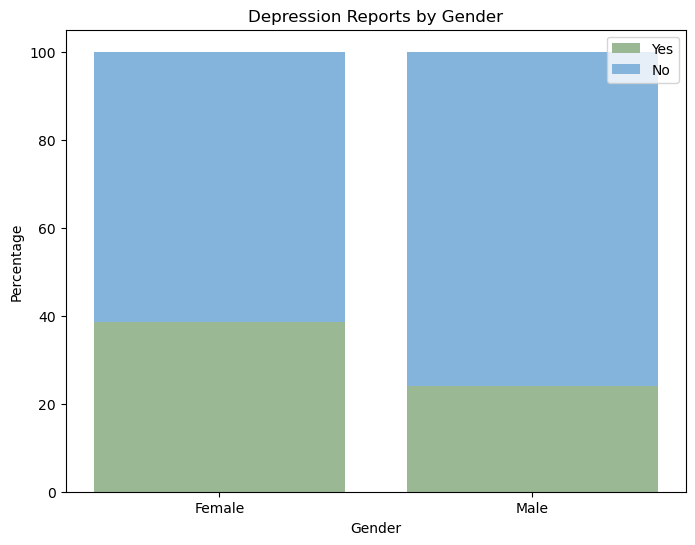

In [134]:
# Making a graph for percetage for depression by gender
# It is similar of the top code but I could not get the percentage and graph to print at the same time so I did it seperately
try:
    # connecting database
    conn = pymysql.connect(host=host, user=user, password=password, database=database)
    cursor = conn.cursor()

    # query for graph by gender for depression
    first_graph_query = """
        SELECT
            gender,
            SUM(CASE WHEN depression = 'Yes' THEN 1 ELSE 0 END) AS yes_count,
            SUM(CASE WHEN depression = 'No' THEN 1 ELSE 0 END) AS no_count,
            COUNT(*) AS total_count
        FROM
            student
        JOIN
            mental_health ON student.student_id = mental_health.student_id
        WHERE
            gender IN ('Female', 'Male')
        GROUP BY
            gender;
    """

    # Executing the query
    cursor.execute(sql_query)
    rows = cursor.fetchall()

    # Getting the results in percetages
    genders = []
    yes_percentages = []
    no_percentages = []

    for row in rows:
        gender, yes_count, no_count, total_count = row
        if total_count > 0:
            yes_percentage = (yes_count / total_count) * 100
            no_percentage = (no_count / total_count) * 100
            genders.append(gender)
            yes_percentages.append(yes_percentage)
            no_percentages.append(no_percentage)

    # Plotting the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(genders, yes_percentages, color='#9bb895', label='Yes')
    plt.bar(genders, no_percentages, bottom=yes_percentages, color='#84b4dc', label='No')
    # The Labels
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.title('Depression Reports by Gender')
    plt.legend()
    
    # Removing background
    plt.gcf().set_facecolor('None')
    plt.gca().set_facecolor('None')

    # Displaying the bar chart
    plt.show()

# For errors to see where code went wrong
except pymysql.Error as e:
    print(f"Error: {e}")

In [112]:
#Second question
#What Effects Does Sleep Quality Have On Psychological Health?

# Query to see if the columns i want to use are within the same range and will work together

# Database connection details
host = 'localhost'
user = 'root'
password = '1734680nN'
database = 'Student_Mental_Health'

# Establishing a connection database
conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# Query to get the maximum and minimum from these columns 
depression_query = """
    SELECT MAX(depression) AS max_depression,
           MIN(depression) AS min_depression
    FROM psychological_health;
"""
self_esteem_query = """
    SELECT MAX(self_esteem) AS max_self_esteem,
           MIN(self_esteem) AS min_self_esteem
    FROM psychological_health;
"""

anxiety_level_query = """
    SELECT MAX(anxiety_level) AS max_anxiety_level,
           MIN(anxiety_level) AS min_anxiety_level
    FROM psychological_health;
"""
sleep_quality_query = """
    SELECT MAX(sleep_quality) AS max_sleep_quality,
           MIN(sleep_quality) AS min_sleep_quality
    FROM physiological_health;
"""

# Executing the query for each
#Depression ex
cursor.execute(depression_query)
max_depression, min_depression = cursor.fetchone() or (None, None)  
# Self Esteem ex
cursor.execute(self_esteem_query)
max_self_esteem, min_self_esteem = cursor.fetchone() or (None, None) 
# Anxiety Level ex
cursor.execute(anxiety_level_query)
max_anxiety_level, min_anxiety_level = cursor.fetchone() or (None, None) 
# Sleep Quality ex
cursor.execute(sleep_quality_query)
max_sleep_quality, min_sleep_quality = cursor.fetchone() or (None, None)  

# Showing the results
print("Maximum and Minimum Depression:")
print(f"Max: {max_depression}, Min: {min_depression}")
print("\nMaximum and Minimum Self Esteem:")
print(f"Max: {max_self_esteem}, Min: {min_self_esteem}")
print("\nMaximum and Minimum Anxiety Level:")
print(f"Max: {max_anxiety_level}, Min: {min_anxiety_level}")
print("\nMaximum and Minimum Sleep Quality:")
print(f"Max: {max_sleep_quality}, Min: {min_sleep_quality}")

Maximum and Minimum Depression:
Max: 27, Min: 0

Maximum and Minimum Self Esteem:
Max: 30, Min: 0

Maximum and Minimum Anxiety Level:
Max: 21, Min: 0

Maximum and Minimum Sleep Quality:
Max: 5, Min: 0


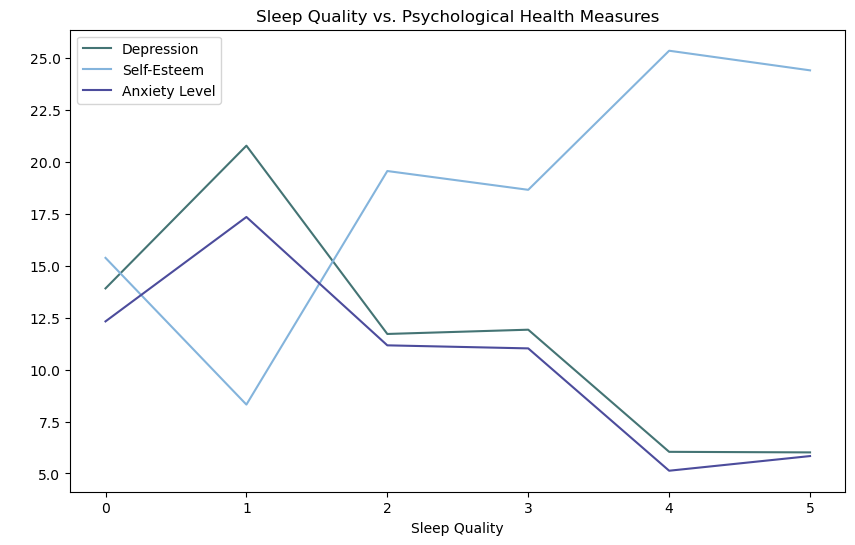

In [127]:
# Importing libraries
# If I double import is just not to have to run all the top ones again and just have them run here when needed

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline # To make a gradient that matched the theme

# connecting to database
conn = {
    'host': 'localhost',
    'user': 'root',
    'password': '1734680nN',
    'db': 'Student_Mental_Health'
}

try:
    # Establishing the connection
    conn = mysql.connector.connect(**conn)
    
    # query to make the graph
    query = """
        SELECT ph.sleep_quality, AVG(phd.depression) AS depression_avg, AVG(phd.self_esteem) AS self_esteem_avg, AVG(phd.anxiety_level) AS anxiety_level_avg
        FROM physiological_health AS ph
        LEFT JOIN psychological_health AS phd ON ph.id = phd.id
        WHERE ph.sleep_quality IS NOT NULL
          AND phd.depression IS NOT NULL
          AND phd.self_esteem IS NOT NULL
          AND phd.anxiety_level IS NOT NULL
        GROUP BY ph.sleep_quality;
    """
    
    # Executing query
    with conn.cursor() as cursor:
        cursor.execute(query)
        results = cursor.fetchall()

    # Converting the results to pandas DataFrame so it is easier to graph
    df = pd.DataFrame(results, columns=['sleep_quality', 'depression_avg', 'self_esteem_avg', 'anxiety_level_avg'])

    # Sorting DataFrame by sleep_quality for plotting
    df.sort_values(by='sleep_quality', inplace=True)

    # Smoothing the lines so it is easier to read 
    plt.figure(figsize=(10, 6))
    smooth_x = df['sleep_quality']
    smooth_y1 = make_interp_spline(smooth_x, df['depression_avg'])(smooth_x)
    smooth_y2 = make_interp_spline(smooth_x, df['self_esteem_avg'])(smooth_x)
    smooth_y3 = make_interp_spline(smooth_x, df['anxiety_level_avg'])(smooth_x)

    # Defining colors to go with our theme on the slides
    colors = ['#447474', '#84b4dc', '#4c4c9c']

    # giving the colors to the lines
    plt.plot(smooth_x, smooth_y1, label='Depression', color=colors[0])
    plt.plot(smooth_x, smooth_y2, label='Self-Esteem', color=colors[1])
    plt.plot(smooth_x, smooth_y3, label='Anxiety Level', color=colors[2])
    
    # Titles and labels
    plt.title('Sleep Quality vs. Psychological Health Measures')
    plt.xlabel('Sleep Quality')
    plt.ylabel(' ')
    
    # Making sure to have a legend
    plt.legend()
    
    # Removing background
    plt.gcf().set_facecolor('None')
    plt.gca().set_facecolor('None')
    
    # Taking off the grid so it is less crowded
    plt.grid(False)
    
    # Showing the plot
    plt.show()

#Error to see if something failed where it went wrong
except mysql.connector.Error as err:
    print(f"Error: {err}")

/var/folders/j_/d1x68wg54_zglllrx37y4jym0000gn/T/ipykernel_11574/2076459349.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


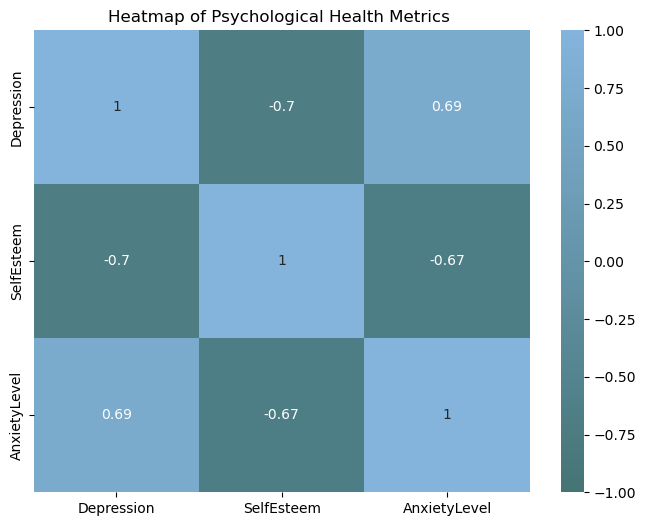

In [155]:
# Importing libraries again 
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Connecting to database
conn = {
    'host': 'localhost',
    'user': 'root',
    'password': '1734680nN',
    'db': 'Student_Mental_Health'
}
# Making a color that matches theme for the graph
def c_colormap(color1, color2):
    """Create a custom colormap with a gradient between two specified colors."""
    cmap = LinearSegmentedColormap.from_list("c_colormap", [color1, color2], N=256)
    return cmap

try:
    # Establishing a connection
    conn = mysql.connector.connect(**conn)
    
    # SQL query for the heat map
    query = """
        SELECT 
            CONCAT(UCASE(LEFT(depression, 1)), SUBSTRING(depression, 2)) AS Depression,
            CONCAT(UCASE(LEFT(self_esteem, 1)), SUBSTRING(self_esteem, 2)) AS SelfEsteem,
            CONCAT(UCASE(LEFT(anxiety_level, 1)), SUBSTRING(anxiety_level, 2)) AS AnxietyLevel
        FROM psychological_health
        WHERE depression IS NOT NULL
          AND self_esteem IS NOT NULL
          AND anxiety_level IS NOT NULL;
    """
    
    # Executing the query into a pandas DataFrame
    df = pd.read_sql(query, conn)

    # Calculating the correlation matrix
    correlation_matrix = df.corr()

    # Defining the colors for graph
    color1 = '#447474'
    color2 = '#84b4dc'
    custom_cmap = c_colormap(color1, color2)

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, vmin=-1, vmax=1)
    plt.title('Heatmap of Psychological Health Metrics ')

    # setting the background to transparent
    plt.gcf().set_facecolor('none')
    plt.gca().set_facecolor('none')

    
#Error message to see where things went wrong if code fails
except mysql.connector.Error as err:
    print(f"MySQL Error: {err}")

/var/folders/j_/d1x68wg54_zglllrx37y4jym0000gn/T/ipykernel_11574/3934777418.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


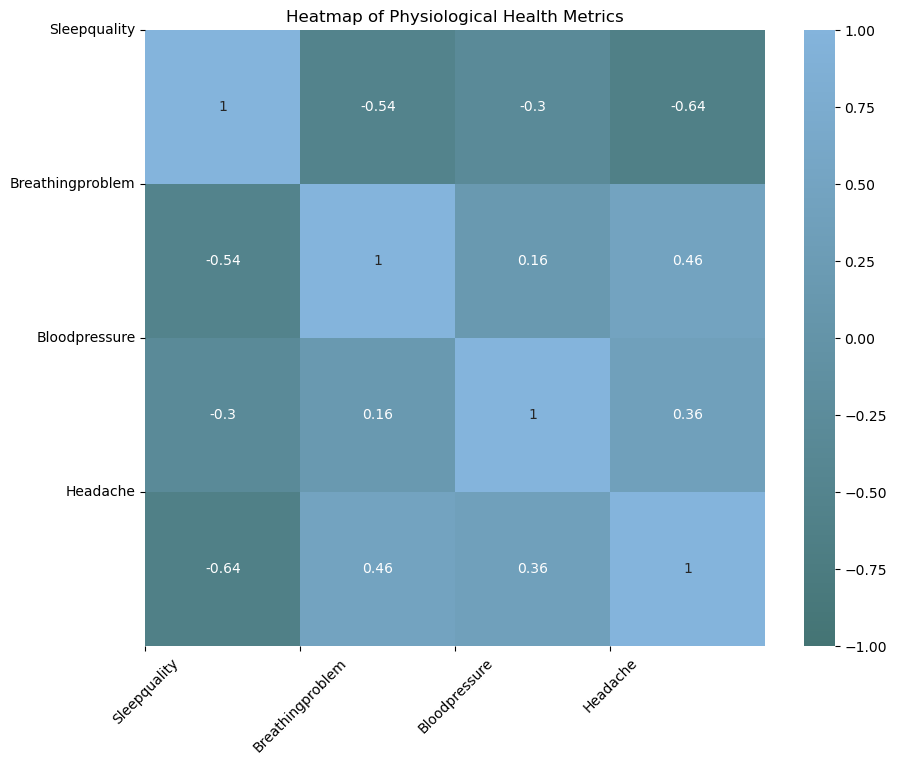

In [153]:
#Connecting to database
connection_info = {
    'host': 'localhost',
    'user': 'root',
    'password': '1734680nN',
    'db': 'Student_Mental_Health'
}

# Color to match theme 
def create_custom_colormap(color1, color2):
    """Create a custom colormap with a gradient between two specified colors."""
    cmap = LinearSegmentedColormap.from_list("custom_colormap", [color1, color2], N=256)
    return cmap

# Removing the column underscores, code kept breaking when i tried it another way only this worked
def format_column_name(column_name):
    """ """
    return ' '.join(word.capitalize() for word in column_name.split('_'))

try:
    # Establishing the connection
    conn = mysql.connector.connect(**connection_info)
    
    # SQL query to fetch sleep_quality, breathing_problems, blood_pressure, headache from physiological_health
    query = """
        SELECT 
            sleep_quality AS SleepQuality,
            breathing_problem AS BreathingProblem,
            blood_pressure AS BloodPressure,
            headache AS Headache
        FROM physiological_health
        WHERE sleep_quality IS NOT NULL
          AND breathing_problem IS NOT NULL
          AND blood_pressure IS NOT NULL
          AND headache IS NOT NULL;
    """
    
    # Getting the data into a pandas DataFrame for graphing
    df = pd.read_sql(query, conn)

    # Closing connection
    conn.close()

    # Calculating the correlation matrix
    correlation_matrix = df.corr()

    # Colors for the graph
    color1 = '#447474'
    color2 = '#84b4dc'
    custom_cmap = create_custom_colormap(color1, color2)

    # Plotting the heatmap 
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, vmin=-1, vmax=1)

    # Formatting the names 
    formatted_columns = [format_column_name(col) for col in correlation_matrix.columns]
    plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=formatted_columns, rotation=45)
    plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=formatted_columns, rotation=0)

    # title
    plt.title('Heatmap of Physiological Health Metrics')

    # Making background transparent
    plt.gcf().set_facecolor('none')
    plt.gca().set_facecolor('none')
#To see where code failed if it doesnt run properly 
except mysql.connector.Error as err:
    print(f"MySQL Error: {err}")

/var/folders/j_/d1x68wg54_zglllrx37y4jym0000gn/T/ipykernel_53501/1890619378.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(mbi_ex_query, conn)


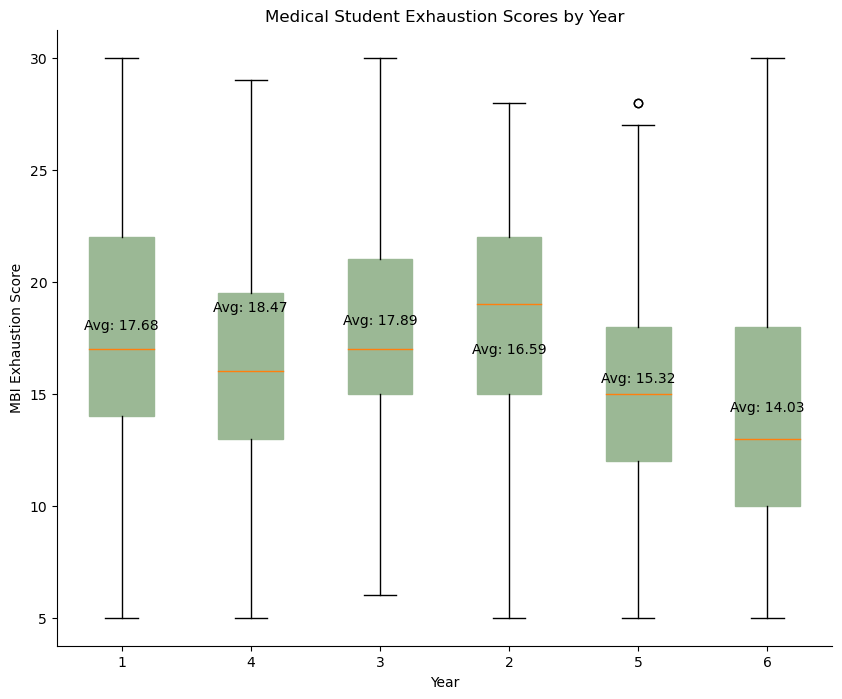

In [1]:
#importing libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connecting information
conn = {
    'host': 'localhost',
    'user': 'root',
    'password': '1734680nN',
    'db': 'Student_Mental_Health'
}

try:
    # Connecting to database
    conn = mysql.connector.connect(**conn)
    
    # query to get MBI Exhaustion scores and their years
    mbi_ex_query = """
        SELECT ms.year, mbi.mbi_ex
        FROM medical_student AS ms
        INNER JOIN maslach_burnout_inventory AS mbi
        ON ms.id = mbi.medical_student_id
        WHERE ms.year IS NOT NULL AND mbi.mbi_ex IS NOT NULL;
    """
    
    # Executing query into a pandas DataFrame
    df = pd.read_sql(mbi_ex_query, conn)

    # Closing connection
    conn.close()

    # Calculating average score for each year
    avg_scores = df.groupby('year')['mbi_ex'].mean().reset_index()

    # Plotting the boxplot 
    plt.figure(figsize=(10, 8))
    boxprops = dict(facecolor='#9bb895', edgecolor='#9bb895')  
    plt.boxplot([df[df['year'] == year]['mbi_ex'] for year in df['year'].unique()],
                labels=df['year'].unique(), patch_artist=True, boxprops=boxprops)
    # putting the average in the graph
    for i, year in enumerate(avg_scores['year']):
        avg_score = avg_scores.loc[avg_scores['year'] == year, 'mbi_ex'].values[0]
        plt.text(i + 1, avg_score + 0.2, f'Avg: {avg_score:.2f}', ha='center', color='black')

    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('MBI Exhaustion Score')
    plt.title('Medical Student Exhaustion Scores by Year')

    # Removing border to make graph simplier
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
# Removing background to make transparent
    plt.gcf().set_facecolor('None')
    plt.gca().set_facecolor('None')

    # Display the plot
    plt.grid(False) #removing back grid lines
    plt.show()
# To see where code failed if I get error
except mysql.connector.Error as err:
    print(f"MySQL Error: {err}")

In [86]:
# Same info as above just a printed version not visual
try:
    # Establishing connection
    conn = mysql.connector.connect(**connection_info)
    
    # query to get average mbi_ex score for each year 
    third_query = """
        SELECT ms.year, AVG(mbi.mbi_ex) AS avg_mbi_ex
        FROM medical_student AS ms
        INNER JOIN maslach_burnout_inventory AS mbi ON ms.id = mbi.medical_student_id
        WHERE ms.year IS NOT NULL AND mbi.mbi_ex IS NOT NULL
        GROUP BY ms.year
        ORDER BY ms.year;
    """
    
    # Executing the query
    cursor = conn.cursor()
    cursor.execute(third_query)
    rows = cursor.fetchall()

    # Closing the connection
    conn.close()

    # Showing the results 
    print("Year\t\tMBI_EX")
    print("------------------------")
    for row in rows:
        year, avg_mbi_ex = row
        print(f"{year}\t\t{avg_mbi_ex:.2f}")
        
    # like above just to see where code failed if it doesn't run
    except mysql.connector.Error as err:
    print(f"MySQL Error: {err}")

Year		MBI_EX
------------------------
1		17.68
2		18.47
3		17.89
4		16.59
5		15.32
6		14.03
